In [1]:
#load R
%load_ext rpy2.ipython

In [3]:
%%R
install.packages("sf")
install.packages("tmap")

(as ‘lib’ is unspecified)












































	‘/tmp/RtmpXvEJ7H/downloaded_packages’

(as ‘lib’ is unspecified)











































































































































	‘/tmp/RtmpXvEJ7H/downloaded_packages’



In [4]:
%%R
#load libraries
library(sf)
library(tmap)


which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



In [7]:
# use git files
!git clone https://github.com/arriagajorge/multi-stage-desing-survey

Cloning into 'multi-stage-desing-survey'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 108 (delta 43), reused 91 (delta 30), pack-reused 0
Receiving objects: 100% (108/108), 16.06 MiB | 4.21 MiB/s, done.
Resolving deltas: 100% (43/43), done.


In [15]:
%%R
# read geographic data
map_mex <- st_read("/content/multi-stage-desing-survey/geographicMap/00ent.shp")

Reading layer `00ent' from data source 
  `/content/multi-stage-desing-survey/geograficMap/00ent.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 32 features and 3 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 911292 ymin: 319149.1 xmax: 4082997 ymax: 2349615
Projected CRS: MEXICO_ITRF_2008_LCC


In [16]:
%%R
#percent house needed
val <- c(15.46, 24.37, 26.07, 25.64, 17.94,   17.02, 27.45, 15.73, 27.02, 19.37,
         19.78, 31.28, 16.02, 17.84, 18.40,   19.25, 18.36, 22.31, 11.59, 25.33,
         23.92, 20.72, 24.49, 15.63, 25.57,   25.20, 27.70, 15.68, 27.05, 22.32,
         23.72, 13.84)

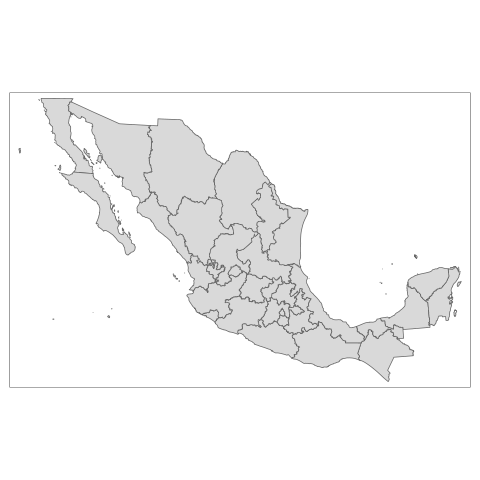

In [18]:
%%R
#show map
qtm(map_mex)

In [21]:
%%R
# info map
str(map_mex)
head(map_mex)

Classes ‘sf’ and 'data.frame':	32 obs. of  4 variables:
 $ CVEGEO  : chr  "01" "02" "03" "04" ...
 $ CVE_ENT : chr  "01" "02" "03" "04" ...
 $ NOMGEO  : chr  "Aguascalientes" "Baja California" "Baja California Sur" "Campeche" ...
 $ geometry:sfc_MULTIPOLYGON of length 32; first list element: List of 1
  ..$ :List of 1
  .. ..$ : num [1:2771, 1:2] 2470518 2470552 2470607 2470637 2470661 ...
  ..- attr(*, "class")= chr [1:3] "XY" "MULTIPOLYGON" "sfg"
 - attr(*, "sf_column")= chr "geometry"
 - attr(*, "agr")= Factor w/ 3 levels "constant","aggregate",..: NA NA NA
  ..- attr(*, "names")= chr [1:3] "CVEGEO" "CVE_ENT" "NOMGEO"
Simple feature collection with 6 features and 3 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 911292 ymin: 692158.7 xmax: 3859532 ymax: 2349615
Projected CRS: MEXICO_ITRF_2008_LCC
  CVEGEO CVE_ENT               NOMGEO                       geometry
1     01      01       Aguascalientes MULTIPOLYGON (((2470518 115...
2     02      02      Baj

In [22]:
%%R
#add info to plot
df <- cbind(map_mex, val)

In [24]:
%%R
head(df)

Simple feature collection with 6 features and 4 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 911292 ymin: 692158.7 xmax: 3859532 ymax: 2349615
Projected CRS: MEXICO_ITRF_2008_LCC
  CVEGEO CVE_ENT               NOMGEO   val                       geometry
1     01      01       Aguascalientes 15.46 MULTIPOLYGON (((2470518 115...
2     02      02      Baja California 24.37 MULTIPOLYGON (((1493197 184...
3     03      03  Baja California Sur 26.07 MULTIPOLYGON (((1694656 122...
4     04      04             Campeche 25.64 MULTIPOLYGON (((3544897 946...
5     05      05 Coahuila de Zaragoza 17.94 MULTIPOLYGON (((2469954 197...
6     06      06               Colima 17.02 MULTIPOLYGON (((1157633 768...


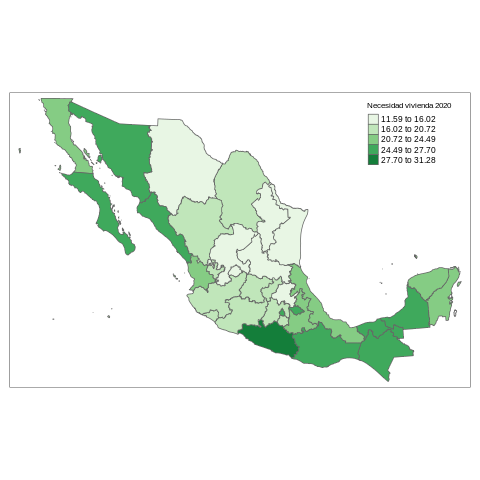

In [29]:
%%R
#plot
tm_shape(df) +
  tm_polygons("val", title="Necesidad vivienda 2020", palette="Greens", style="jenks") +
  tm_layout(legend.title.size=0.8)

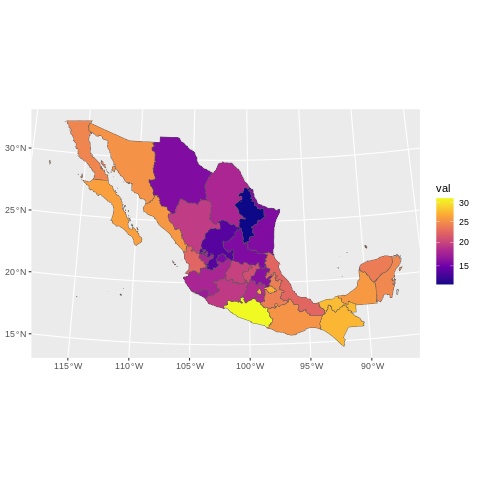

In [48]:
%%R
#another plot
ggplot(df) +
  geom_sf(aes(fill = val)) +
  scale_fill_viridis_c(option="plasma", trans = "sqrt")